# Introduction

Facial recognition is everywhere, from the front sensors of our smartphones to the security cameras. But how facial recognition work to classify faces?

In this little project we will use Haar Classifier, or Haar cascade classifier which is a machine learning object detection program that identifies objects. You can find a detailed description of Haar classifiers in Paul Viola and Michael Jones’s paper “Rapid Object Detection using a Boosted Cascade of Simple Features”.

# Imports

In [ ]:
import numpy as np
import cv2

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Creating Training and Validation generators

In [ ]:
train_dir = 'C:/Users/SI RANY/Desktop/GProjects/Myemo/train'
val_dir = 'C:/Users/SI RANY/Desktop/GProjects/Myemo/test'

train_datagen = ImageDataGenerator(rescale=1./255,
                                  zoom_range=0.3)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 19346 images belonging to 4 classes.
Found 4796 images belonging to 4 classes.


# Building the Model

We will use a stack of Conv2D and MaxPooling2D layers, then we will add Dense layers in the top.
To mitigate overgitting, we will use dropout as a regularization technique.
Finally we will use softmax as an activation function because it is a multiclassification task.

In [ ]:
model_emo = Sequential()

model_emo.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model_emo.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_emo.add(MaxPooling2D(pool_size=(2, 2)))
model_emo.add(Dropout(0.25))

model_emo.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model_emo.add(MaxPooling2D(pool_size=(2, 2)))
model_emo.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model_emo.add(MaxPooling2D(pool_size=(2, 2)))
model_emo.add(Dropout(0.25))

model_emo.add(Flatten())
model_emo.add(Dense(1024, activation='relu'))
model_emo.add(Dropout(0.5))
model_emo.add(Dense(4, activation='softmax'))

print("Model Created!")

Model Created!


# Compiling the Model

In [ ]:
model_emo.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001, decay=1e-6),metrics=['accuracy'])

model_emo_info = model_emo.fit_generator(
        train_generator,
        steps_per_epoch=19346 // 64,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=4796 // 64)

C:\Users\SI RANY\anaconda3\envs\JREnv\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
C:\Users\SI RANY\anaconda3\envs\JREnv\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
302/302 [==============================] - 253s 836ms/step - loss: 1.3342 - accuracy: 0.3752 - val_loss: 1.2851 - val_accuracy: 0.4117
Epoch 2/50
302/302 [==============================] - 256s 847ms/step - loss: 1.2143 - accuracy: 0.4601 - val_loss: 1.1036 - val_accuracy: 0.5467
Epoch 3/50
302/302 [==============================] - 258s 855ms/step - loss: 1.1361 - accuracy: 0.5094 - val_loss: 1.0452 - val_accuracy: 0.5606
Epoch 4/50
302/302 [==============================] - 284s 939ms/step - loss: 1.0846 - accuracy: 0.5415 - val_loss: 0.9906 - val_accuracy: 0.6045
Epoch 5/50
302/302 [==============================] - 304s 1s/step - loss: 1.0479 - accuracy: 0.5601 - val_loss: 0.9504 - val_accuracy: 0.6201
Epoch 6/50
302/302 [==============================] - 268s 887ms/step - loss: 1.0158 - accuracy: 0.5766 - val_loss: 0.9103 - val_accuracy: 0.6358
Epoch 7/50
302/302 [==============================] - 261s 865ms/step - loss: 0.9764 - accuracy: 0.5963 - val_loss: 0.9051 - va

In [ ]:
#Saving the weights and the model for later use
model_emo.save_weights('C:/Users/SI RANY/Desktop/GProjects/Myemo/modelweights_emotion.h5')
model_emo.save('C:/Users/SI RANY/Desktop/GProjects/Myemo/model_emotion.h5')

# Plotting

In [ ]:
import matplotlib.pyplot as plt

train_acc = model_emo_info.history['accuracy']
train_loss = model_emo_info.history['loss']

val_acc = model_emo_info.history['val_accuracy']
val_loss = model_emo_info.history['val_loss']

epochs = range(1, len(train_acc)+1)

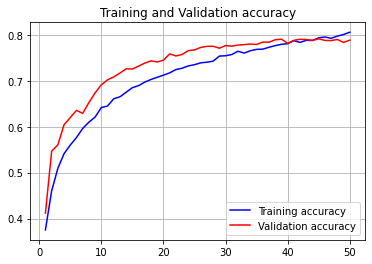

In [ ]:
plt.plot(epochs, train_acc, "b", label="Training accuracy")
plt.plot(epochs, val_acc, "r", label="Validation accuracy")
plt.legend()
plt.title("Training and Validation accuracy")
plt.grid(True)

plt.show()

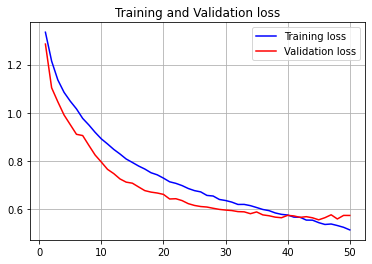

In [ ]:
plt.plot(epochs, train_loss, "b", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.legend()
plt.title("Training and Validation loss")
plt.grid(True)

plt.show()

# We will rewrite the model then load our saved weights

In [ ]:
import numpy as np
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

model_emo = Sequential()

model_emo.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model_emo.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_emo.add(MaxPooling2D((2, 2)))
model_emo.add(Dropout(0.3))

model_emo.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model_emo.add(MaxPooling2D((2, 2)))
model_emo.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model_emo.add(MaxPooling2D((2, 2)))
model_emo.add(Dropout(0.3))

model_emo.add(Flatten())
model_emo.add(Dense(1024, activation='relu'))
model_emo.add(Dropout(0.5))
model_emo.add(Dense(4, activation='softmax'))

model_emo.load_weights('C:/Users/SI RANY/Desktop/GProjects/Myemo/modelweights_emotion.h5')

# Creating open_camera() method

We will Implement the Haar Cascade classifier into our code which is an easy task using OpenCV's CascadeClassifier function

In [ ]:
cv2.ocl.setUseOpenCL(False)

emotion_dict = {0: "Angry", 1: "Happy", 2: "Neutral", 3: "Surprised"}

In [ ]:
def open_camera():
    cap = cv2.VideoCapture(0)
    print("Detecting ...")
    while True:
    
        ret, frame = cap.read()
        if not ret:
            break
    
        bounding_box = cv2.CascadeClassifier('C:/Users/SI RANY/Desktop/GProjects/Myemo/opencv-master/data/haarcascades/haarcascade_frontalface_default.xml')
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        num_faces = bounding_box.detectMultiScale(gray_frame,scaleFactor=1.3, minNeighbors=7)

        for (x, y, w, h) in num_faces:
            cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (0, 0, 255), 2)
            roi_gray_frame = gray_frame[y:y + h, x:x + w]
            cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (48, 48)), -1), 0)
            emotion = model_emo.predict(cropped_img)
            maxindex = int(np.argmax(emotion))
            cv2.putText(frame, emotion_dict[maxindex], (x+20, y-60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        cv2.imshow('MyEmotion', cv2.resize(frame,(1200,860),interpolation = cv2.INTER_CUBIC))

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
            
    cap.release()
    cv2.destroyAllWindows()

# Running our Emotions Detector

In [ ]:
open_camera()

Detecting ...
